
# Spam Classifier 
The solution is divided into the following sections:

- Data understanding and exploration
- Data Preprocessing
- Data preparation
- Model building and evaluation



# 1. Data Understanding and Exploration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
dt=pd.read_csv("spam.csv",encoding="latin-1")
dt.head(4)

,class,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...


In [115]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
class    5572 non-null object
SMS      5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [116]:
dt.shape

(5572, 2)

In [117]:
dt['spam'] = dt['class'].map({'ham': 0, 'spam': 1})
dt.head(4)

,class,SMS,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0


In [118]:
dt["length"]=dt["SMS"].apply(lambda x: len(x))
dt.head(4)

,class,SMS,spam,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49


In [119]:
dt["spam"].value_counts()

0    4825
1     747
Name: spam, dtype: int64

### Performing EDA

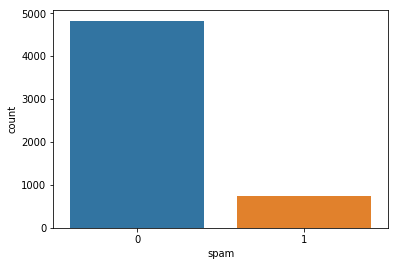

In [120]:
sns.countplot(x="spam",data=dt)

C:\Users\Hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


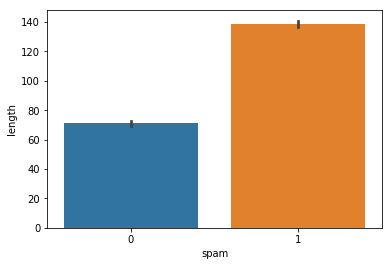

In [121]:
sns.barplot(x=dt["spam"],y=dt["length"])

In [122]:
from wordcloud import WordCloud,STOPWORDS

In [123]:
dt1=dt[dt["spam"]==0]
words1=" ".join(dt1["SMS"])
spam_words=" ".join([word for word in words1.split()])
wordcloud1=WordCloud(stopwords=STOPWORDS,background_color="black",width=1600,height=800).generate(spam_words)

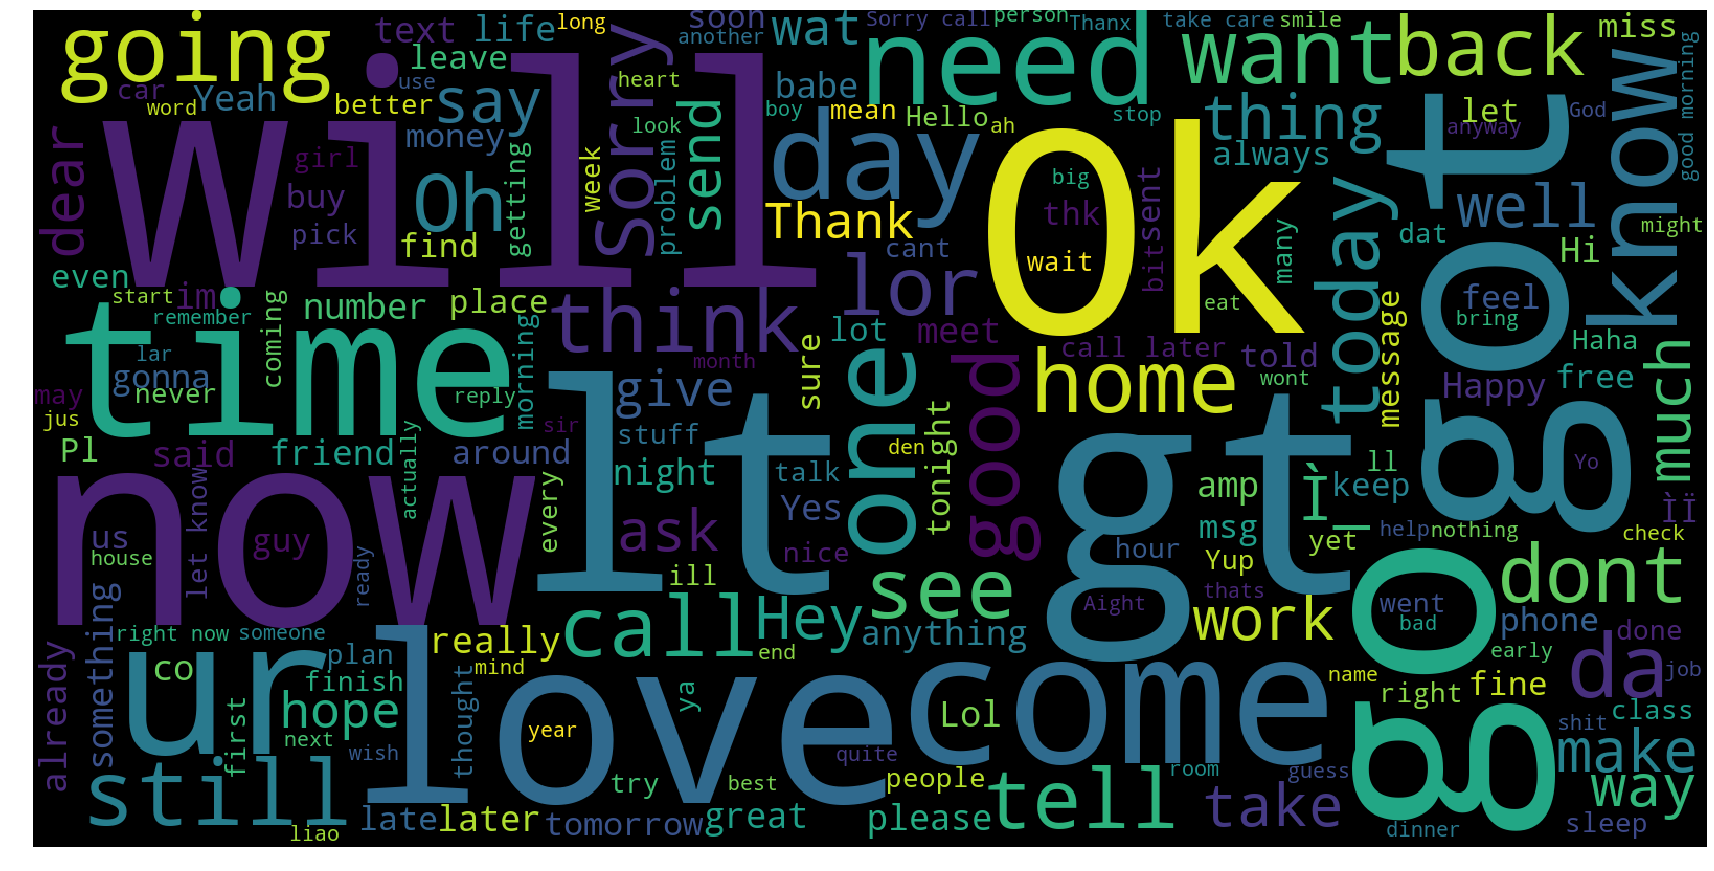

In [124]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()

In [125]:
dt2=dt[dt["spam"]==1]
words2=" ".join(dt2["SMS"])
ham_words=" ".join([word for word in words2.split()])
wordcloud2=WordCloud(stopwords=STOPWORDS,background_color="black",width=1600,height=800).generate(ham_words)

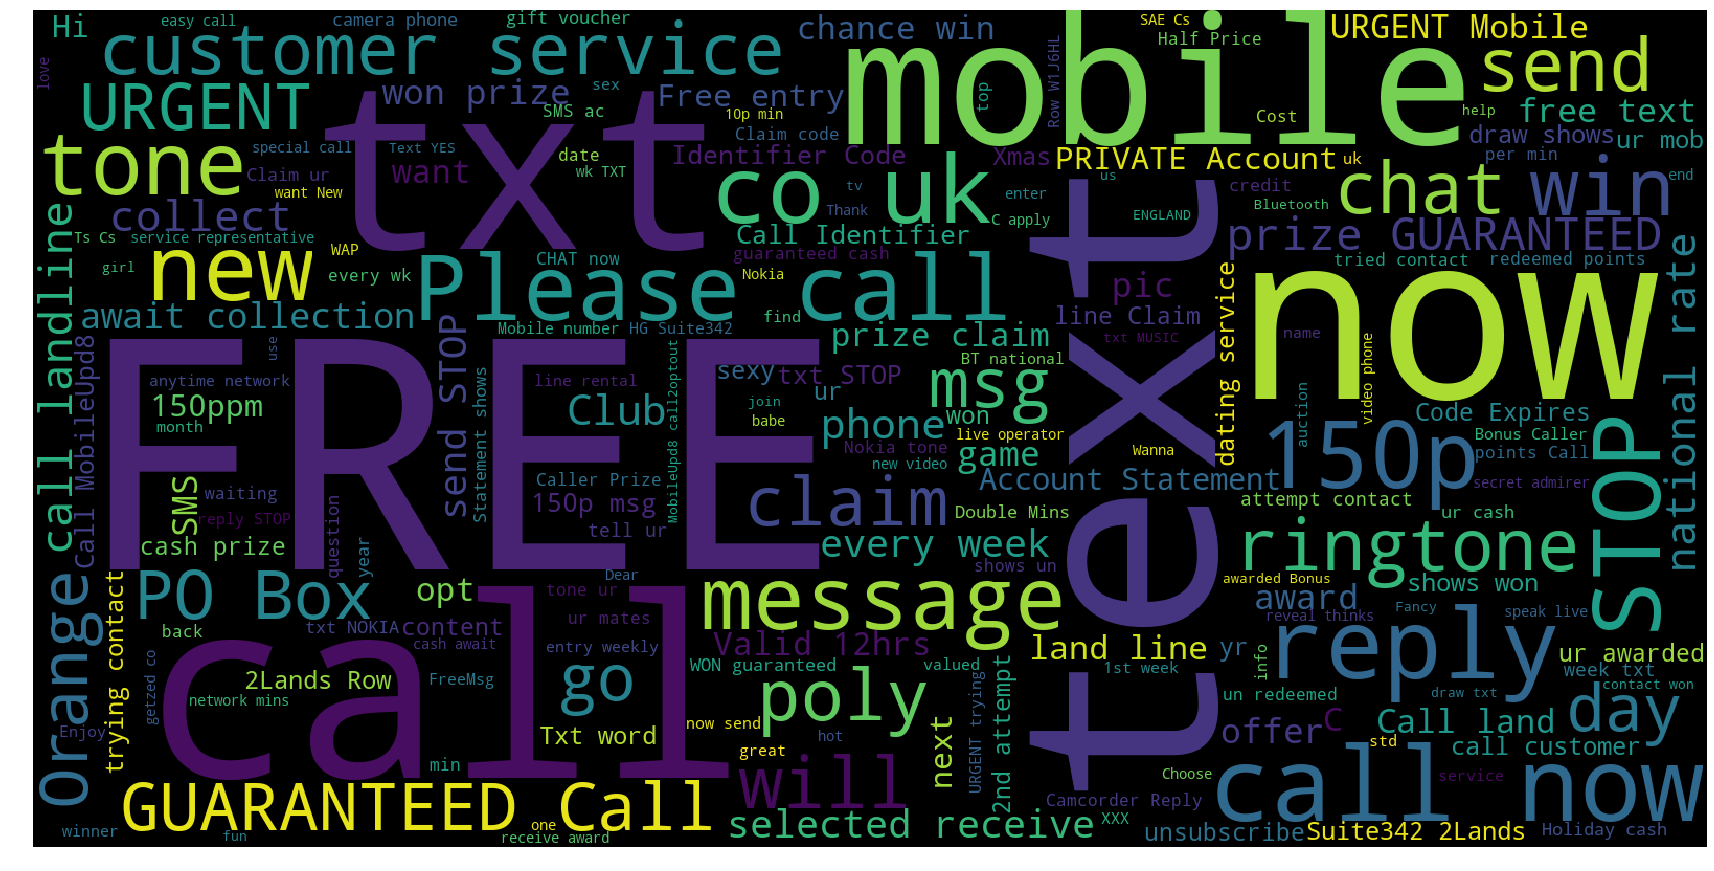

In [126]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

# 2. Data Preprocessing

In [127]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [128]:
def processed(SMS):
    sms= re.sub("[^a-zA-Z]", " ",SMS)
    # change sentence to lower case
    SMS=sms.lower().split()
    # remove stop words                
    sms=[s1 for s1 in SMS if not s1 in stopwords.words("english")]
    # stemming the words
    snow=SnowballStemmer("english")
    sms=[snow.stem(s1) for s1 in sms]
    return(" ".join(sms))

In [129]:
dt['SMS_processed']=dt['SMS'].apply(lambda x: processed(x))

dt.head(10)

,class,SMS,spam,length,SMS_processed
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,0,29,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,free entri wkli comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,0,49,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,nah think goe usf live around though
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1,148,freemsg hey darl week word back like fun still...
6,ham,Even my brother is not like to speak with me. ...,0,77,even brother like speak treat like aid patent
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0,160,per request mell mell oru minnaminungint nurun...
8,spam,WINNER!! As a valued network customer you have...,1,158,winner valu network custom select receivea pri...
9,spam,Had your mobile 11 months or more? U R entitle...,1,154,mobil month u r entitl updat latest colour mob...


# 3. Data Preparation

Selecting columns to implement the model selection

In [130]:
x = dt['SMS_processed']
y = dt['spam']

### Stratified Shuffle Split

Splitting data into train and test datasets using Stratified Shuffle Split

In [136]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(test_size=0.2, random_state=42)
sss.get_n_splits(x, y)
for train_index, test_index in sss.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

### TF-IDF

Using TF-IDF for feature extraction of the text data

In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_train=TfidfVectorizer(lowercase=True)
x_train_n=vectorizer_train.fit_transform(x_train.values)
x_test_n=vectorizer_train.transform(x_test.values)

# 4. Model Building and Evaluation

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

### Logistic Regression

In [144]:

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train_n,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [145]:
y_LR=LR.predict(x_test_n)
accuracy_LR=accuracy_score(y_test,y_LR)*100
f1_LR=f1_score(y_test,y_LR)
print("Accuracy :",accuracy_LR,"%")
print("F1 score :",f1_LR)

Accuracy : 97.13004484304932 %
F1 score : 0.8814814814814815


### Naive Bayes

In [152]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train_n.toarray(),y_train)
y_NB= NB.predict(x_test_n.toarray())
accuracy_NB=accuracy_score(y_test,y_NB)*100
f1_NB=f1_score(y_test,y_NB)
print("Accuracy :",accuracy_NB,"%")
print("F1 score :",f1_NB)

Accuracy : 84.93273542600896 %
F1 score : 0.6018957345971564


### SVM

In [154]:
from sklearn.svm import SVC
SVC = SVC()
SVC.fit(x_train_n,y_train)
y_SVC= SVC.predict(x_test_n)
accuracy_SVC=accuracy_score(y_test,y_SVC)*100
f1_SVC=f1_score(y_test,y_SVC)
print("Accuracy :",accuracy_SVC,"%")
print("F1 score :",f1_SVC)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy : 86.63677130044843 %
F1 score : 0.6018957345971564


### Random Forest

In [156]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train_n,y_train)
y_RF= RF.predict(x_test_n)
accuracy_RF=accuracy_score(y_test,y_RF)*100
f1_RF=f1_score(y_test,y_RF)
print("Accuracy :",accuracy_RF,"%")
print("F1 score :",f1_RF)

Accuracy : 98.20627802690582 %
F1 score : 0.9290780141843972


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Decision Tree

In [158]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train_n,y_train)
y_DT= DT.predict(x_test_n)
accuracy_DT=accuracy_score(y_test,y_DT)*100
f1_DT=f1_score(y_test,y_DT)
print("Accuracy :",accuracy_DT,"%")
print("F1 score :",f1_DT)

Accuracy : 97.48878923766816 %
F1 score : 0.9020979020979021


## Comparing Scores of All Trained Models

In [160]:
accuracy=[accuracy_LR,accuracy_NB,accuracy_SVC,accuracy_RF,accuracy_DT]

f1_score = [f1_LR,f1_NB,f1_SVC,f1_RF,f1_DT]
d = {
    'Algorithms' : ['Logistic Regression','Naive Bayes','SVM','Random Forest','Decision Tree'],
    'F1_Score' : f1_score,
    'Accuracy' : accuracy
}
df = pd.DataFrame(d)
df

,Algorithms,F1_Score,Accuracy
0,Logistic Regression,0.881481,97.130045
1,Naive Bayes,0.601896,84.932735
2,SVM,0.601896,86.636771
3,Random Forest,0.929078,98.206278
4,Decision Tree,0.902098,97.488789


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

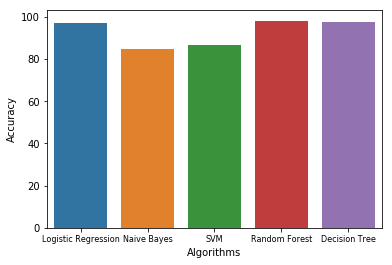

In [165]:
sns.barplot(x=df.Algorithms,y=df.Accuracy)
plt.xticks(fontsize=8)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

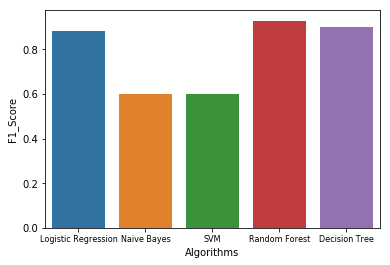

In [166]:
sns.barplot(x=df.Algorithms,y=df.F1_Score)
plt.xticks(fontsize=8)

Conclusion : All the accuracies and performance of various classifiers compared .

